In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_train = pd.read_csv('../Datasets/AmesHousing-Price/train.csv')
df_test = pd.read_csv('../Datasets/AmesHousing-Price/test.csv')

In [13]:
df = pd.concat([df_train, df_test], axis=0)

In [14]:
col_to_drop = []

for col in df.columns:
    null = df[col].isnull().sum()
    if (null / df[col].shape[0] >= 0.5):
        col_to_drop.append(col)
    print(f'Col Name: {col}, num of null: {null / df[col].shape[0]}')

Col Name: Id, num of null: 0.0
Col Name: MSSubClass, num of null: 0.0
Col Name: MSZoning, num of null: 0.0013703323055841042
Col Name: LotFrontage, num of null: 0.16649537512846865
Col Name: LotArea, num of null: 0.0
Col Name: Street, num of null: 0.0
Col Name: Alley, num of null: 0.9321685508735869
Col Name: LotShape, num of null: 0.0
Col Name: LandContour, num of null: 0.0
Col Name: Utilities, num of null: 0.0006851661527920521
Col Name: LotConfig, num of null: 0.0
Col Name: LandSlope, num of null: 0.0
Col Name: Neighborhood, num of null: 0.0
Col Name: Condition1, num of null: 0.0
Col Name: Condition2, num of null: 0.0
Col Name: BldgType, num of null: 0.0
Col Name: HouseStyle, num of null: 0.0
Col Name: OverallQual, num of null: 0.0
Col Name: OverallCond, num of null: 0.0
Col Name: YearBuilt, num of null: 0.0
Col Name: YearRemodAdd, num of null: 0.0
Col Name: RoofStyle, num of null: 0.0
Col Name: RoofMatl, num of null: 0.0
Col Name: Exterior1st, num of null: 0.00034258307639602604
Co

In [15]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [16]:
df.drop(col_to_drop, axis=1, inplace=True)

In [17]:
num_temp = df.select_dtypes(include=np.number)
cat_temp = df.select_dtypes(include='object')

In [18]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [19]:
knn_imputer = KNNImputer()
sim_imputer = SimpleImputer(strategy='most_frequent')

encoder = OneHotEncoder(handle_unknown='ignore')

num = knn_imputer.fit_transform(num_temp)
num = pd.DataFrame(num, columns=num_temp.columns)

cat = sim_imputer.fit_transform(cat_temp)
cat_trans = encoder.fit_transform(cat).toarray()
cat = pd.DataFrame(cat_trans, columns=encoder.get_feature_names_out(cat_temp.columns))

In [20]:
df_clean = pd.concat([num, cat], axis=1)
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_clean.set_index('Id', inplace=True)

In [22]:
df_clean['TotoalYear'] = df_clean['YrSold'] - df_clean['YearRemodAdd']
df_clean['TotalSF'] = df_clean['BsmtFinSF1'] + df_clean['BsmtFinSF2'] + df_clean['BsmtUnfSF'] + df_clean['1stFlrSF'] + df_clean['2ndFlrSF'] + df_clean['LowQualFinSF'] + df_clean['TotalBsmtSF'] + df_clean['WoodDeckSF'] + df_clean['OpenPorchSF']
df_clean['TotalBath'] = df_clean['BsmtFullBath'] + 0.5 * df_clean['BsmtHalfBath'] + df_clean['FullBath'] + 0.5 * df_clean['HalfBath']
df_clean['TootalAbvGrd'] = df_clean['BedroomAbvGr'] + df_clean['KitchenAbvGr'] + df_clean['TotRmsAbvGrd']
df_clean['TotalArea'] = df_clean['LotArea'] + df_clean['MasVnrArea'] + df_clean['GrLivArea'] + df_clean['GarageArea'] + df_clean['PoolArea']
df_clean['TotalPorch'] = df_clean['OpenPorchSF'] + df_clean['EnclosedPorch'] + df_clean['3SsnPorch'] + df_clean['ScreenPorch']

In [23]:
train_index = np.array(df_train.Id-1)
test_index = np.array(df_test.Id-1)

train = df_clean.iloc[train_index]
test = df_clean.iloc[test_index]

In [24]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
#iso = IsolationForest(random_state=42)
#outlier_iso = iso.fit_predict(train)
#train['outlier_iso'] = outlier_iso
#train['outlier_iso'].value_counts()

In [26]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)

In [27]:
train = pd.DataFrame(train_scaled, columns=train.columns)

In [28]:
lof = LocalOutlierFactor(n_neighbors=20)
outlier_lof = lof.fit_predict(train_scaled)
train['outlier_lof'] = outlier_lof
print(train['outlier_lof'].value_counts())

 1    1163
-1     297
Name: outlier_lof, dtype: int64


In [29]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca = pd.DataFrame(X_pca)
X_pca['outlier_lof'] = train['outlier_lof']

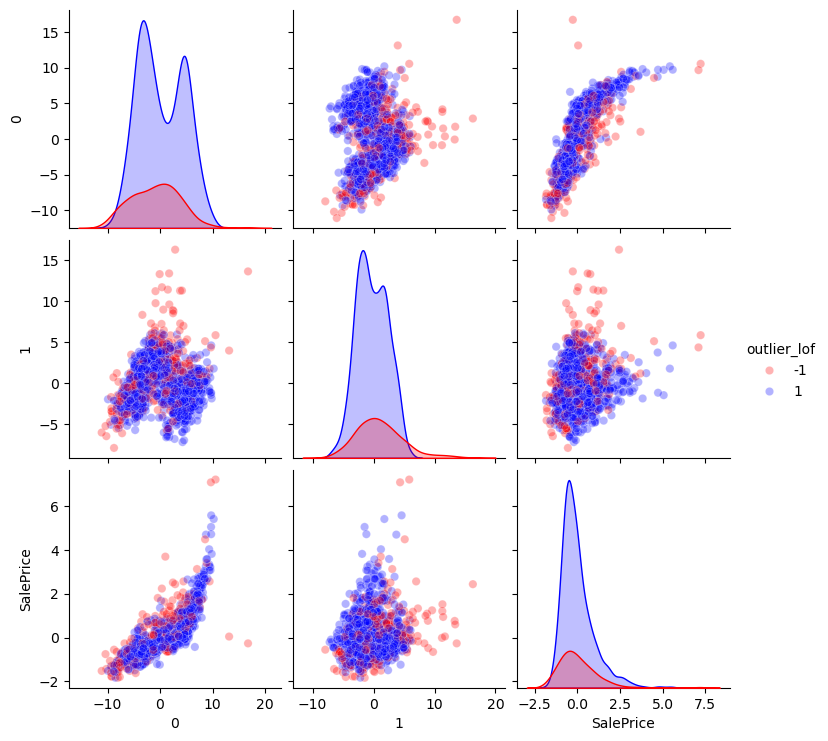

In [31]:
sns.pairplot(pd.concat([X_pca, y], axis=1), hue='outlier_lof', palette={1:'blue', -1:'red'}, plot_kws={'alpha':0.3})

In [32]:
train_clean = train[train['outlier_lof'] != -1]

X = train_clean.drop('SalePrice', axis=1)
y = train_clean['SalePrice']

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [34]:
mi = mutual_info_regression(X, y)
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi

TotalSF             0.616720
OverallQual         0.591840
GrLivArea           0.488522
YearBuilt           0.464949
GarageCars          0.407131
                      ...   
GarageQual_Po       0.000000
Electrical_FuseF    0.000000
Electrical_Mix      0.000000
MiscVal             0.000000
3SsnPorch           0.000000
Length: 282, dtype: float64

In [35]:
X_mi = X[mi[mi > 0.1].index]

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
models = {
    'Random Forest' : RandomForestRegressor(n_jobs=-1),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'XGBoost' : XGBRegressor(n_jobs=-1),
    'LGBMRegressor' : LGBMRegressor(verbose=-1),
    'CatBoostRegressor' : CatBoostRegressor(verbose=False)
}

for name, model in models.items():
    score_temp = cross_val_score(model, X_mi, y, cv=kf, scoring='r2', n_jobs=-1)
    print(f'Model name: {name}, scoring {np.mean(score_temp)}')

In [ ]:
p = PowerTransformer()
p.fit(y.values.reshape(-1,1))
y_t = p.transform(y.values.reshape(-1,1))

In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
base_models = {
    'Random Forest' : RandomForestRegressor(n_jobs=-1),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'XGBoost' : XGBRegressor(n_jobs=-1)
}

random_forest_params = {
    'n_estimators' : [500, 700, 900, 1200],
    'max_depth' : [None, 1, 3, 5, 7, 9],
    'min_samples_split' : [2, 3, 4, 6, 9],
    'min_samples_leaf' : [1, 3, 5, 7, 9],
    'random_state' : [42],
    'n_jobs' : [-1]
}

gradient_boosting_params = {
    'n_estimators' : [300, 500, 700, 900],
    'max_depth' : [None, 1, 3, 6],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'min_samples_split' : [2, 3, 4, 6, 9]
}

xgboost_params = {
    'n_estimators' : [300, 500, 700, 900],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.8, 1],
    'max_depth' : np.arange(1,4),
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0,5],
    'reg_lambda' : [1,3,5,7],
    'reg_alpha' : [1,3,5,7],
    'n_jobs' : [-1]

}

best_moodels = []
params = [random_forest_params, gradient_boosting_params, xgboost_params]
i = 0
for name, model in base_models.items():
  random_search = RandomizedSearchCV(model,
                                     param_distributions=params[i],
                                     n_iter=30,
                                     cv=kf,
                                     n_jobs=-1,
                                     verbose=True,
                                     random_state=42)
  random_search.fit(X_mi, y)
  best_moodels.append(random_search.best_estimator_)
  i += 1
  print(f'Best params for {name}, params: {random_search.best_params_}')
  print(f'Best score for {name}, score: {random_search.best_score_}')
  print('-'*30)
  print('\n'*3)

In [ ]:
vote = VotingRegressor(estimators=[
    ('r', best_moodels[0]),
    ('g', best_moodels[1]),
    ('x', best_moodels[2]),
    ('l', LGBMRegressor(verbose=-1, n_jobs=-1)),
    ('c', CatBoostRegressor(verbose=False, thread_count=-1))
], weights=(1,2,2,2,2))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
base_models = [('v', vote)]

stack = StackingRegressor(base_models, final_estimator=linreg)

In [ ]:
stack.fit(X_mi, y_t)

In [ ]:
score_1 = cross_val_score(stack, X_mi, y_t.ravel(), cv=kf, n_jobs=-1)
score_1

In [ ]:
np.mean(score_1)

In [ ]:
test2 = scaler.inverse_transform(test)

In [ ]:
test2 = pd.DataFrame(test2, columns=test.columns)

In [ ]:
test = test2.loc[:, X_mi.columns]

In [ ]:
predict = stack.predict(test)

In [ ]:
submission = p.inverse_transform(predict.reshape(-1,1))

In [ ]:
submission = pd.DataFrame({'Id': df_test['Id'].values,
                          'SalePrice':submission.ravel()})

In [ ]:
submission.to_csv('submission1.csv', index=False)

In [ ]:
#sns.histplot(train['SalePrice'])